In [1]:

# Setup: import library
import os
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import f_oneway, kruskal, pearsonr, spearmanr
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from scipy.stats import trim_mean

# Display settings
pd.set_option("display.max_columns", 200)
pd.set_option("display.width", 160)
sns.set(style='whitegrid')

print('Libraries loaded successfully.')

Libraries loaded successfully.


## 2. Load Dataset

Notebook ini mencoba beberapa jalur umum untuk menemukan file `Sample - Superstore.csv`. Jika kamu menjalankan di Google Colab, mount Google Drive; jika di lokal, pastikan file berada di direktori yang sesuai.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import pearsonr, spearmanr
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
import os, json

from google.colab import drive
drive.mount('/content/drive')

base_path = "/content/drive/MyDrive"
csv_path = os.path.join(base_path, "Sample - Superstore.csv")

output_dir = os.path.join(base_path, "output")
os.makedirs(output_dir, exist_ok=True)

print("CSV path:", csv_path)
print("Output folder:", output_dir)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
CSV path: /content/drive/MyDrive/Sample - Superstore.csv
Output folder: /content/drive/MyDrive/output


## 3. Quick EDA (Exploratory Data Analysis)

Melihat tipe data, nilai kosong, dan ringkasan statistik dasar.

In [6]:

df = pd.read_csv(csv_path, encoding='latin1')
print("Shape:", df.shape)
display(df.head(8))
display(df.info())
display(df.describe(include='all').T.head(20))


Shape: (9994, 21)


Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID    Customer Name    Segment        Country             City       State  \
0       1  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520      Claire Gute   Consumer  United States        Henderson    Kentucky   
1       2  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520      Claire Gute   Consumer  United States        Henderson    Kentucky   
2       3  CA-2016-138688   6/12/2016   6/16/2016    Second Class    DV-13045  Darrin Van Huff  Corporate  United States      Los Angeles  California   
3       4  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   Sean O'Donnell   Consumer  United States  Fort Lauderdale     Florida   
4       5  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   Sean O'Donnell   Consumer  United States  Fort Lauderdale     Florida   
5       6  CA-2014-115812    6/9/2014   6/14/2014  Standard Class    BH-11710  Brosina Hoffman   Consumer  United States      Los Angeles  California   
6       7  CA-2014-115812    6/9/2014   6/14/2014  Standard Class    BH-11710  Brosina Hoffman   Consumer  United States      Los Angeles  California   
7       8  CA-2014-115812    6/9/2014   6/14/2014  Standard Class    BH-11710  Brosina Hoffman   Consumer  United States      Los Angeles  California   

   Postal Code Region       Product ID         Category Sub-Category                                       Product Name     Sales  Quantity  Discount  \
0        42420  South  FUR-BO-10001798        Furniture    Bookcases                  Bush Somerset Collection Bookcase  261.9600         2      0.00   
1        42420  South  FUR-CH-10000454        Furniture       Chairs  Hon Deluxe Fabric Upholstered Stacking Chairs,...  731.9400         3      0.00   
2        90036   West  OFF-LA-10000240  Office Supplies       Labels  Self-Adhesive Address Labels for Typewriters b...   14.6200         2      0.00   
3        33311  South  FUR-TA-10000577        Furniture       Tables      Bretford CR4500 Series Slim Rectangular Table  957.5775         5      0.45   
4        33311  South  OFF-ST-10000760  Office Supplies      Storage                     Eldon Fold 'N Roll Cart System   22.3680         2      0.20   
5        90032   West  FUR-FU-10001487        Furniture  Furnishings  Eldon Expressions Wood and Plastic Desk Access...   48.8600         7      0.00   
6        90032   West  OFF-AR-10002833  Office Supplies          Art                                         Newell 322    7.2800         4      0.00   
7        90032   West  TEC-PH-10002275       Technology       Phones                     Mitel 5320 IP Phone VoIP phone  907.1520         6      0.20   

     Profit  
0   41.9136  
1  219.5820  
2    6.8714  
3 -383.0310  
4    2.5164  
5   14.1694  
6    1.9656  
7   90.7152

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

None

count unique              top  freq          mean          std     min      25%      50%      75%       max
Row ID         9994.0    NaN              NaN   NaN        4997.5  2885.163629     1.0  2499.25   4997.5  7495.75    9994.0
Order ID         9994   5009   CA-2017-100111    14           NaN          NaN     NaN      NaN      NaN      NaN       NaN
Order Date       9994   1237         9/5/2016    38           NaN          NaN     NaN      NaN      NaN      NaN       NaN
Ship Date        9994   1334       12/16/2015    35           NaN          NaN     NaN      NaN      NaN      NaN       NaN
Ship Mode        9994      4   Standard Class  5968           NaN          NaN     NaN      NaN      NaN      NaN       NaN
Customer ID      9994    793         WB-21850    37           NaN          NaN     NaN      NaN      NaN      NaN       NaN
Customer Name    9994    793    William Brown    37           NaN          NaN     NaN      NaN      NaN      NaN       NaN
Segment          9994      3         Consumer  5191           NaN          NaN     NaN      NaN      NaN      NaN       NaN
Country          9994      1    United States  9994           NaN          NaN     NaN      NaN      NaN      NaN       NaN
City             9994    531    New York City   915           NaN          NaN     NaN      NaN      NaN      NaN       NaN
State            9994     49       California  2001           NaN          NaN     NaN      NaN      NaN      NaN       NaN
Postal Code    9994.0    NaN              NaN   NaN  55190.379428  32063.69335  1040.0  23223.0  56430.5  90008.0   99301.0
Region           9994      4             West  3203           NaN          NaN     NaN      NaN      NaN      NaN       NaN
Product ID       9994   1862  OFF-PA-10001970    19           NaN          NaN     NaN      NaN      NaN      NaN       NaN
Category         9994      3  Office Supplies  6026           NaN          NaN     NaN      NaN      NaN      NaN       NaN
Sub-Category     9994     17          Binders  1523           NaN          NaN     NaN      NaN      NaN      NaN       NaN
Product Name     9994   1850  Staple envelope    48           NaN          NaN     NaN      NaN      NaN      NaN       NaN
Sales          9994.0    NaN              NaN   NaN    229.858001   623.245101   0.444    17.28    54.49   209.94  22638.48
Quantity       9994.0    NaN              NaN   NaN      3.789574      2.22511     1.0      2.0      3.0      5.0      14.0
Discount       9994.0    NaN              NaN   NaN      0.156203     0.206452     0.0      0.0      0.2      0.2       0.8

In [7]:
num_cols = df.select_dtypes(include=['number']).columns.tolist()
cat_cols = df.select_dtypes(include=['object']).columns.tolist()

num_imputer = SimpleImputer(strategy='median')
cat_imputer = SimpleImputer(strategy='most_frequent')

df[num_cols] = num_imputer.fit_transform(df[num_cols])
df[cat_cols] = cat_imputer.fit_transform(df[cat_cols])

df['ProfitRatio'] = df['Profit'] / (df['Sales'].replace(0, np.nan))
df['ProfitRatio'] = df['ProfitRatio'].fillna(0)

display(df[['Sales','Profit','Discount','ProfitRatio']].describe().T)

count        mean         std       min       25%      50%       75%        max
Sales        9994.0  229.858001  623.245101     0.444  17.28000  54.4900  209.9400  22638.480
Profit       9994.0   28.656896  234.260108 -6599.978   1.72875   8.6665   29.3640   8399.976
Discount     9994.0    0.156203    0.206452     0.000   0.00000   0.2000    0.2000      0.800
ProfitRatio  9994.0    0.120314    0.466754    -2.750   0.07500   0.2700    0.3625      0.500

## 5. Visualisasi Distribusi & Korelasi

Gunakan seaborn untuk melihat distribusi `Sales`, `Profit`, `Discount`, dan korelasi antar variabel kuantitatif.

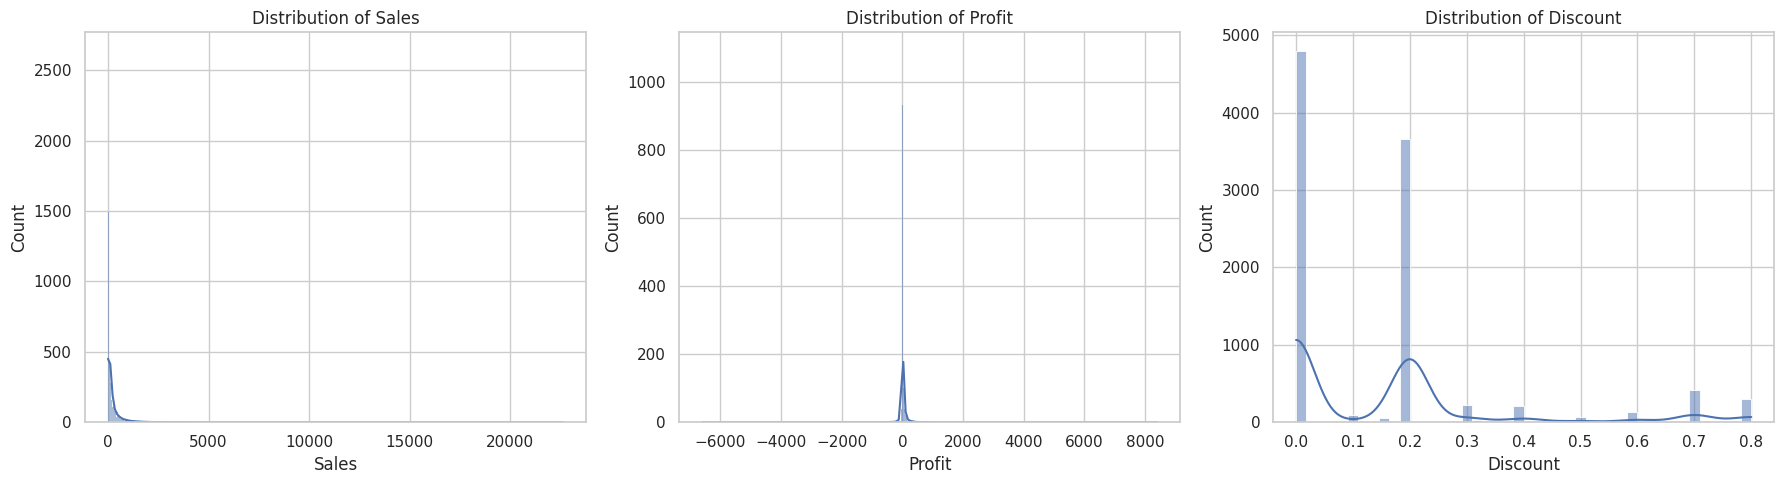

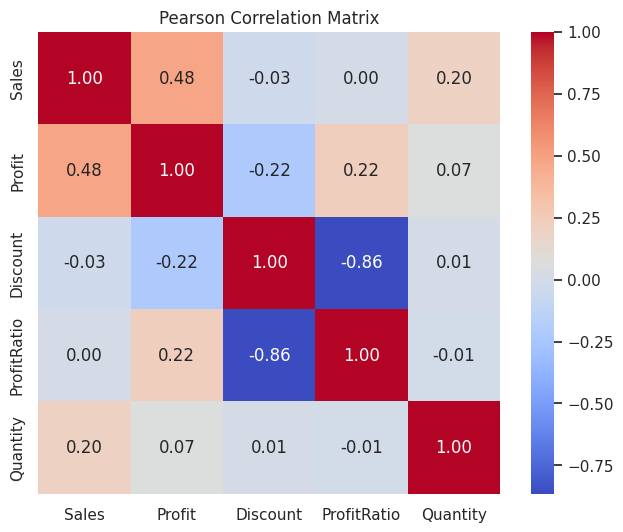

In [8]:

fig, axs = plt.subplots(1,3, figsize=(18,5))
sns.histplot(df['Sales'], kde=True, ax=axs[0]).set(title='Distribution of Sales')
sns.histplot(df['Profit'], kde=True, ax=axs[1]).set(title='Distribution of Profit')
sns.histplot(df['Discount'], kde=True, ax=axs[2]).set(title='Distribution of Discount')
plt.tight_layout()
plt.show()

num_features = ['Sales','Profit','Discount','ProfitRatio','Quantity']
corr = df[num_features].corr(method='pearson')
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Pearson Correlation Matrix')
plt.show()

## 6. Perbandingan Penjualan antar Region

Analisis penjualan (Sales) dan profit per `Region` menggunakan visualisasi: barplot, boxplot.

Region        Sales       Profit  Quantity
3     West  725457.8245  108418.4489   12266.0
1     East  678781.2400   91522.7800   10618.0
0  Central  501239.8908   39706.3625    8780.0
2    South  391721.9050   46749.4303    6209.0

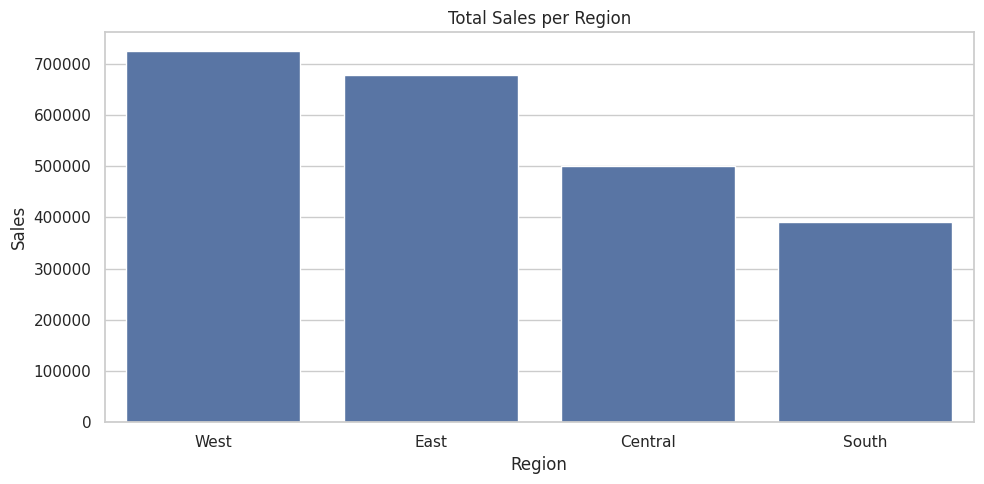

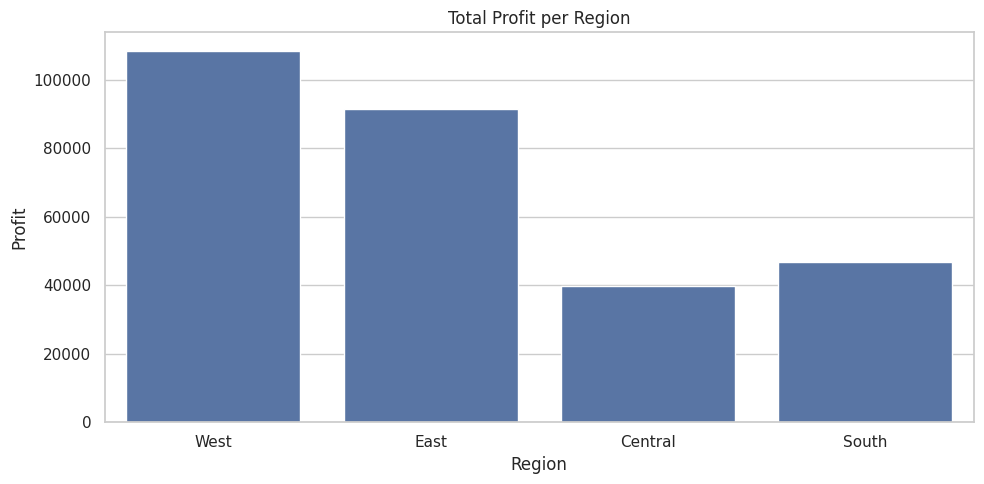

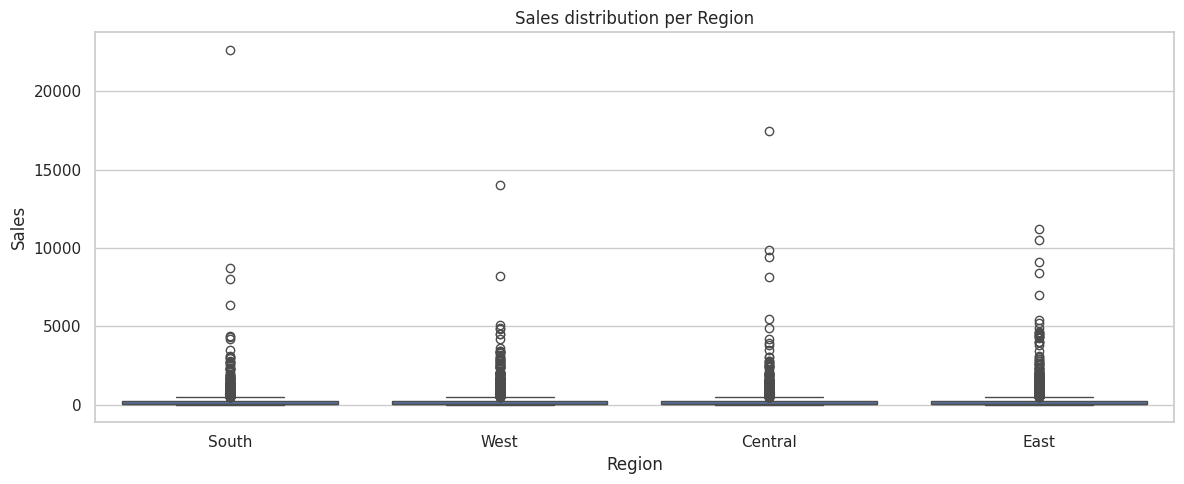

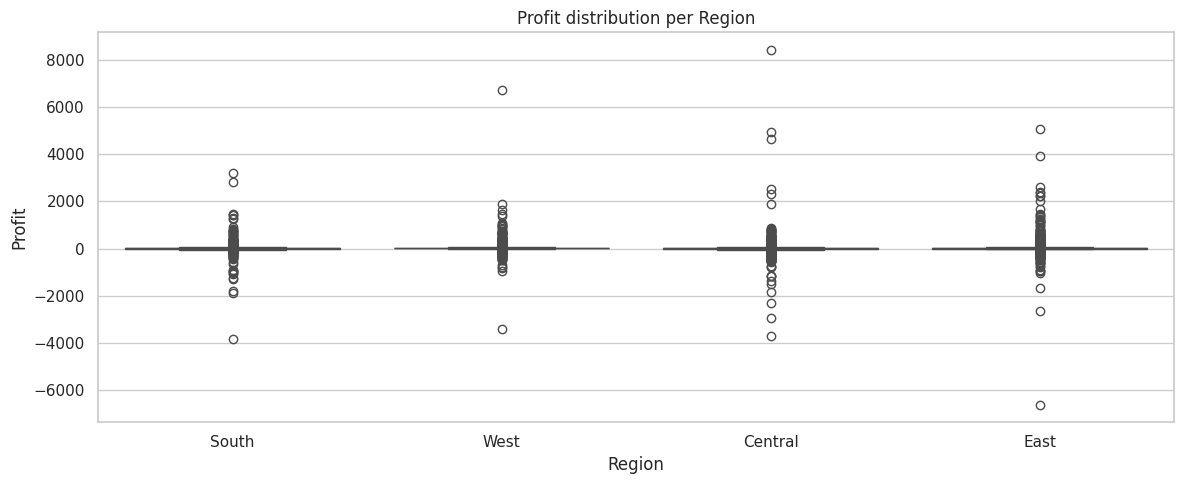

In [9]:
region_summary = df.groupby('Region').agg({'Sales':'sum','Profit':'sum','Quantity':'sum'}).reset_index().sort_values('Sales', ascending=False)
display(region_summary)

plt.figure(figsize=(10,5))
sns.barplot(data=region_summary, x='Region', y='Sales')
plt.title('Total Sales per Region')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10,5))
sns.barplot(data=region_summary, x='Region', y='Profit')
plt.title('Total Profit per Region')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12,5))
sns.boxplot(data=df, x='Region', y='Sales')
plt.title('Sales distribution per Region')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12,5))
sns.boxplot(data=df, x='Region', y='Profit')
plt.title('Profit distribution per Region')
plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

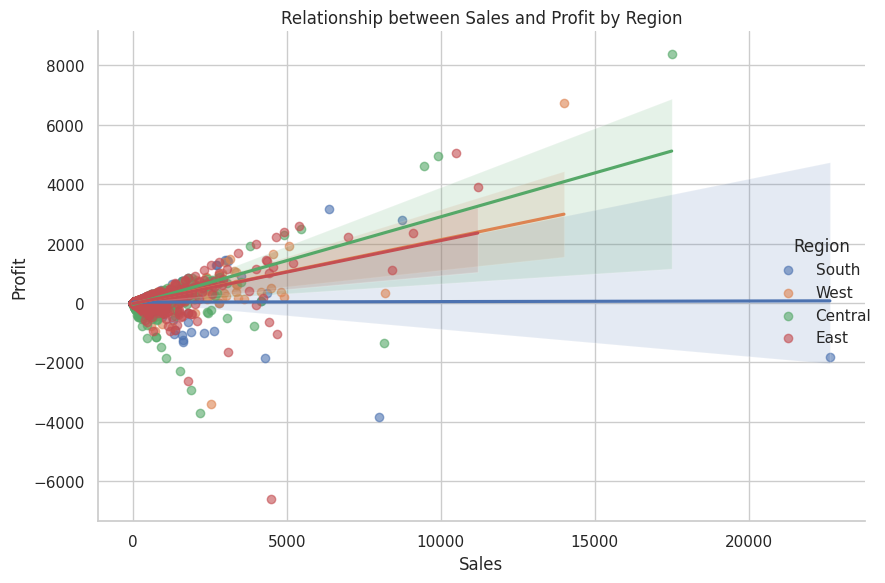

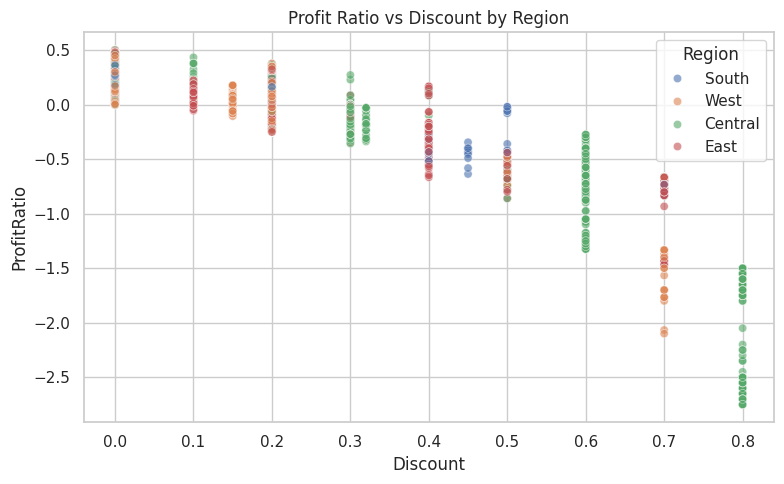

In [16]:
plt.figure(figsize=(10, 6))
sns.lmplot(data=df, x='Sales', y='Profit', hue='Region', height=6, aspect=1.3, scatter_kws={'alpha':0.6})
plt.title('Relationship between Sales and Profit by Region')
plt.tight_layout()
plt.show()

plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='Discount', y='ProfitRatio', hue='Region', alpha=0.6)
plt.title('Profit Ratio vs Discount by Region')
plt.tight_layout()
plt.show()

## 7. Statistik Lanjut: Uji ANOVA & Kruskal-Wallis untuk Profit antar Region

- Pertama cek asumsi normalitas dan homogeneity of variances.
- Jika asumsi terpenuhi: ANOVA satu arah.
- Jika tidak: Kruskal-Wallis (non-parametric).

In [10]:
regions = df['Region'].unique().tolist()
profit_groups = [df.loc[df['Region']==r, 'Profit'].values for r in regions]

print('Shapiro-Wilk test per region: (stat, p)')
shapiro_results = {r: stats.shapiro(df.loc[df['Region']==r, 'Profit'].sample(n=min(500, df.loc[df['Region']==r].shape[0]), random_state=1)) for r in regions}
for r,res in shapiro_results.items():
    print(r, res)

levene_stat, levene_p = stats.levene(*profit_groups)
print('\nLevene test for equal variances: stat=%.4f, p=%.4f' % (levene_stat, levene_p))

kw_stat, kw_p = kruskal(*profit_groups)
print('\nKruskal-Wallis test: H=%.4f, p=%.4f' % (kw_stat, kw_p))

model = ols('Profit ~ C(Region)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print('\nANOVA table:')
display(anova_table)

Shapiro-Wilk test per region: (stat, p)
South ShapiroResult(statistic=np.float64(0.27584489758496444), pvalue=np.float64(3.821763530460151e-40))
West ShapiroResult(statistic=np.float64(0.38516340059248844), pvalue=np.float64(6.585275555449872e-38))
Central ShapiroResult(statistic=np.float64(0.14698214395685028), pvalue=np.float64(1.8937446692831512e-42))
East ShapiroResult(statistic=np.float64(0.2993391339759398), pvalue=np.float64(1.0923045503273544e-39))

Levene test for equal variances: stat=5.5786, p=0.0008

Kruskal-Wallis test: H=227.8997, p=0.0000

ANOVA table:


sum_sq      df         F    PR(>F)
C(Region)  4.315373e+05     3.0  2.622478  0.048892
Residual   5.479623e+08  9990.0       NaN       NaN

### 7.1 Post-hoc: Jika Kruskal/ANOVA signifikan, lakukan perbandingan post-hoc (Tukey HSD untuk ANOVA, atau pairwise Mann-Whitney untuk non-parametric).

In [11]:
try:
    tukey = pairwise_tukeyhsd(df['Profit'], df['Region'])
    print(tukey.summary())
except Exception as e:
    print('Tukey HSD error / not appropriate:', e)

from itertools import combinations
pairs = list(combinations(regions, 2))
pw_results = []
for a,b in pairs:
    a_vals = df.loc[df['Region']==a, 'Profit']
    b_vals = df.loc[df['Region']==b, 'Profit']
    stat, p = stats.mannwhitneyu(a_vals, b_vals, alternative='two-sided')
    pw_results.append({'group1':a, 'group2':b, 'stat':stat, 'p_raw':p, 'p_bonf':min(p*len(pairs),1.0)})
pw_df = pd.DataFrame(pw_results).sort_values('p_bonf')
display(pw_df)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
 group1 group2 meandiff p-adj   lower    upper  reject
------------------------------------------------------
Central   East  15.0431 0.0986  -1.7808  31.867  False
Central  South   11.765 0.4065   -7.714  31.244  False
Central   West  16.7563  0.043   0.3566 33.1561   True
   East  South  -3.2781 0.9697  -22.005 15.4487  False
   East   West   1.7132  0.992 -13.7857 17.2121  False
  South   West   4.9914 0.8975 -13.3553 23.3381  False
------------------------------------------------------


group1   group2       stat         p_raw        p_bonf
3     West  Central  4590569.0  5.451658e-50  3.270995e-49
1    South  Central  2203119.5  6.172570e-20  3.703542e-19
5  Central     East  2895639.5  1.151104e-14  6.906622e-14
4     West     East  5058821.5  2.161112e-13  1.296667e-12
0    South     West  2423209.5  1.776007e-04  1.065604e-03
2    South     East  2404507.5  1.851267e-02  1.110760e-01

## 9. Korelasi: Pearson & Spearman

Hitung korelasi antar Sales, Profit, Discount, Quantity, serta korelasi rank (Spearman).

Pearson correlation:


Sales    Profit  Discount  Quantity  ProfitRatio
Sales        1.000000  0.479064 -0.028190  0.200795     0.003444
Profit       0.479064  1.000000 -0.219487  0.066253     0.223732
Discount    -0.028190 -0.219487  1.000000  0.008623    -0.864452
Quantity     0.200795  0.066253  0.008623  1.000000    -0.005280
ProfitRatio  0.003444  0.223732 -0.864452 -0.005280     1.000000


Spearman correlation:


Sales    Profit  Discount  Quantity  ProfitRatio
Sales        1.000000  0.518407 -0.056969  0.327426    -0.199872
Profit       0.518407  1.000000 -0.543350  0.234491     0.500253
Discount    -0.056969 -0.543350  1.000000 -0.000878    -0.645112
Quantity     0.327426  0.234491 -0.000878  1.000000     0.000877
ProfitRatio -0.199872  0.500253 -0.645112  0.000877     1.000000

Text(0.5, 1.02, 'Pairplot numeric features')

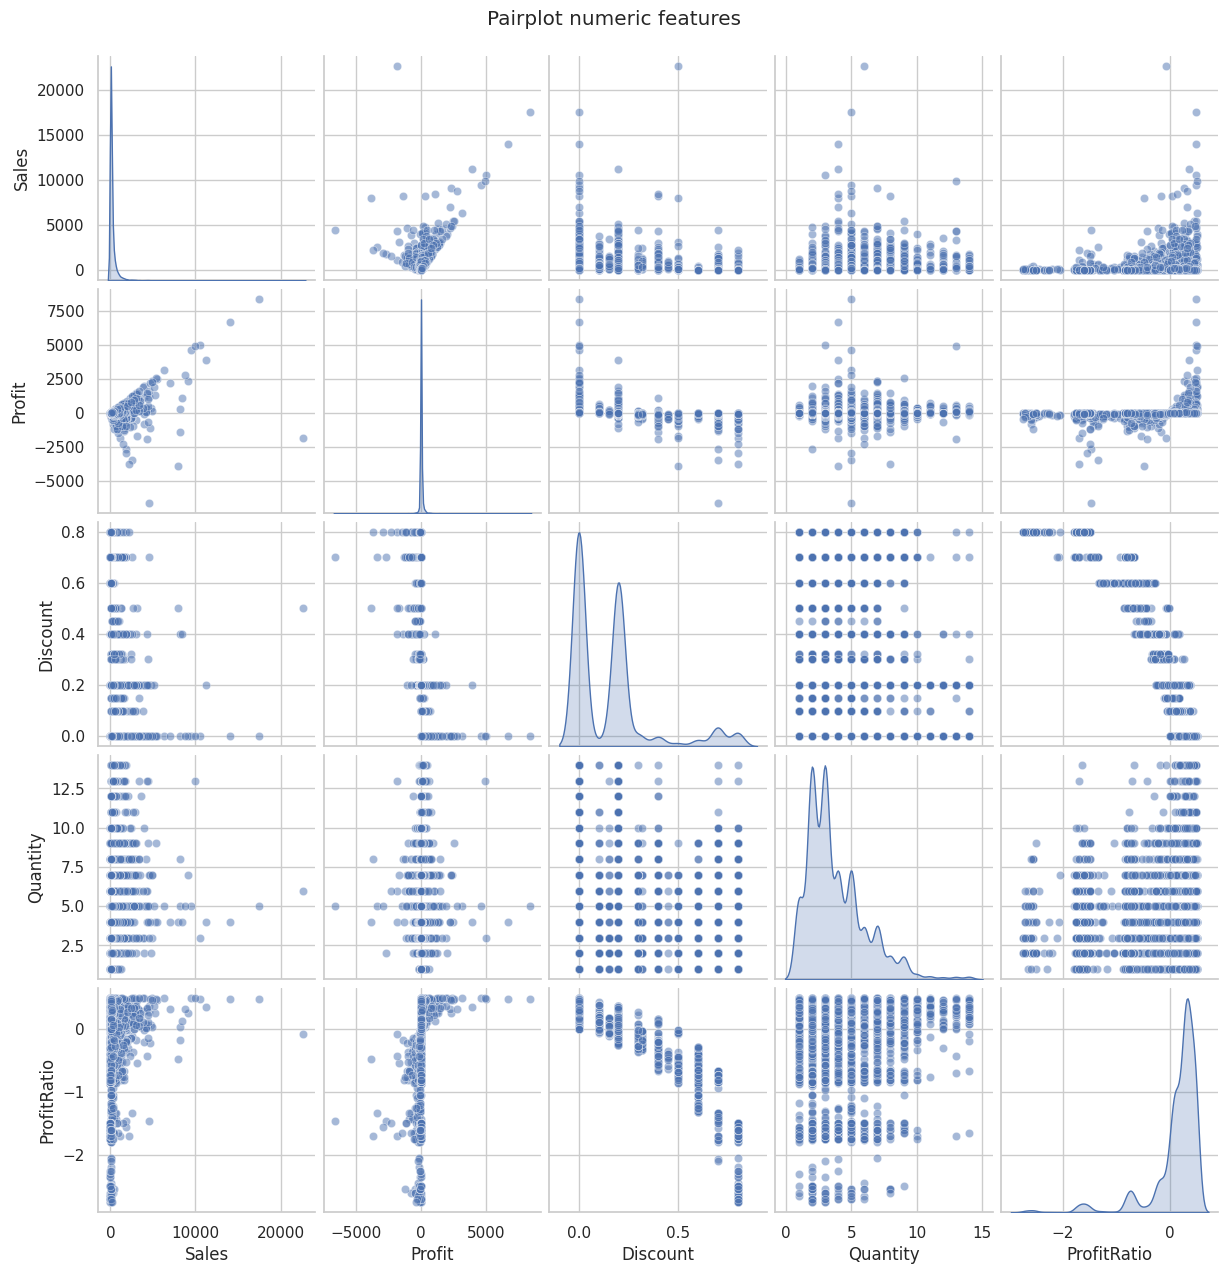

In [20]:
numeric = ['Sales','Profit','Discount','Quantity','ProfitRatio']
pearson = df[numeric].corr(method='pearson')
spearman = df[numeric].corr(method='spearman')

print('Pearson correlation:')
display(pearson)
print('\nSpearman correlation:')
display(spearman)

pairplot = sns.pairplot(df[numeric], diag_kind='kde', plot_kws={'alpha':0.5})
plt.suptitle('Pairplot numeric features', y=1.02)

